## Mandelbrot Set

**Def:** Let $c$ be a complex number, $c$ belong to **Mandelbrot set** if and only if the sequence {$z_{i+1}=z_i^2+c \ | \ z_0=c$} is limitaded.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def test_convergence(
                     c:complex, 
                     epsilon:float = 1e-3, 
                     lim_z:float = 1e10, 
                     max_steps:int = 1000
                    ) -> bool:
    """
    answers if the number <c> belongs to the Mandelbrot Set
    
    Args:
        c: (complex) 
        epsilon: (float) accuracy of convergence test
        lim_z: (float) upper bound to define that the sequence diverged
        max_steps: (int) maximum number of iterations to test convergence
        
    Returns:
        str: if the sequence "Z_(i) = (Z_(i-1))^2 + c | Z_(0) = c" converged. 
        or "converge"", or "diverged" or "limited"
    """

    z0 = c
    z = z0*z0 + c
    delta = z - z0
    i=1
    
    abs_c = lambda c: np.sqrt((c*c.conjugate()).real)
    while (i<=max_steps) and (abs_c(delta)>epsilon) and (abs_c(z)<lim_z):
        z0 = z
        z = z*z +c
        delta = z - z0
        i += 1
        
    if abs_c(z) > lim_z:
        return 'diverged'
    elif abs_c(delta) < epsilon:
        return 'converged'
    else:
        return 'limited'

def mandelbrot_set(
                   n_pixels:int = 1000, 
                   real_range:tuple = (-2, 0.5), 
                   im_range:tuple = (-1.13, 1.13), 
                   epsilon:float = 1e-3, 
                   lim_z:float = 1e10, 
                   max_steps:int = 1000
                  ):
    """
    create the pixels values of the image, defining he Mandelbrot set
    
    Args:
        n_pixels: (int) number of pixels in one direction 
        real_range: (tuple) limits of the real parts of the numbers that will be tests in the function "test_convergence"
        im_range: (tuple) limits of the imaginary parts of the numbers that will be tests in the function "test_convergence"
        epsilon: (float) accuracy of convergence test
        lim_z: (float) upper bound to define that the sequence diverged
        max_steps: (int) maximum number of iterations to test convergence
        
    Returns:
        numpy.ndarray 2D: image pixels values of Mandelbrot set
    """
    
    # create map between pixel location and the value of complex number c that will be test in the function "test_convergence"
    convex_combination = lambda alpha, lim_inf, lim_sup: alpha*lim_inf + (1-alpha)*lim_sup
    mapper = lambda i, j: complex(
                                  convex_combination(1-i/(n_pixels-1), real_range[0], real_range[1]), 
                                  convex_combination(1-j/(n_pixels-1), im_range[0], im_range[1])
                                 )
    
    # compute image pixels
    pixel_value = {'converged': 0, 'limited': 100, 'diverged': 250}
    img = np.full((n_pixels, n_pixels), 250)
    for i in range(n_pixels):
        for j in range(n_pixels):   
            c = mapper(i, j)
            test_convergence_c = test_convergence(c, epsilon, max_steps)
            img[j][i] = pixel_value[test_convergence_c]
            
    return img

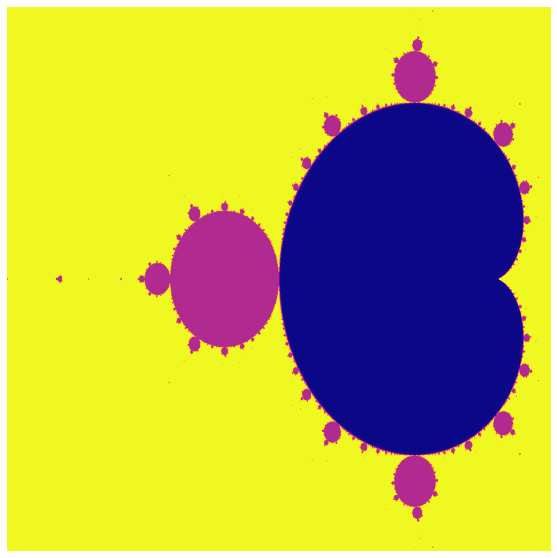

In [5]:
img = mandelbrot_set(
                     n_pixels=1000, 
                     max_steps=100, 
                     real_range= (-2, 0.5), 
                     im_range = (-1, 1), 
                     epsilon=1e-2,
                     lim_z=1e10
                    )

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='plasma')
plt.axis("off")
plt.show()